In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from json_parser_trivy import create_df

In [2]:
df= create_df()
print(df)

    VulnerabilityID                                  PkgName    Status  \
0    CVE-2022-33987                                      got     fixed   
1    CVE-2022-25881                     http-cache-semantics     fixed   
2    CVE-2023-42282                                       ip     fixed   
3    CVE-2022-29244                                      npm     fixed   
4    CVE-2022-25883                                   semver     fixed   
..              ...                                      ...       ...   
860  CVE-2023-45288                         golang.org/x/net     fixed   
861  CVE-2024-24786               google.golang.org/protobuf     fixed   
862  CVE-2023-34624  net.sourceforge.htmlcleaner:htmlcleaner  affected   
863  CVE-2024-21742      org.apache.james:apache-mime4j-core     fixed   
864  CVE-2021-33813                            org.jdom:jdom  affected   

    Severity                                    Container  
0     MEDIUM      jsons/docker_scout/sboms/odoo_sbo

<Axes: >

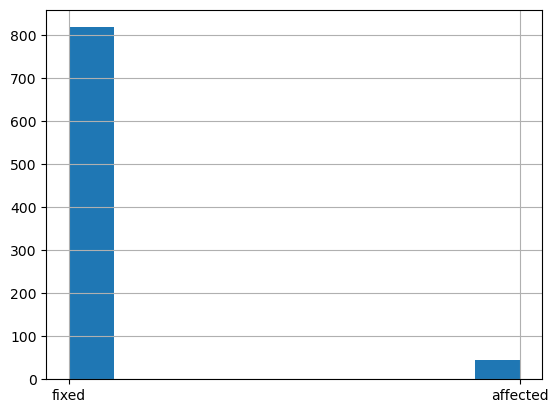

In [3]:
df['Status'].hist()

<Axes: >

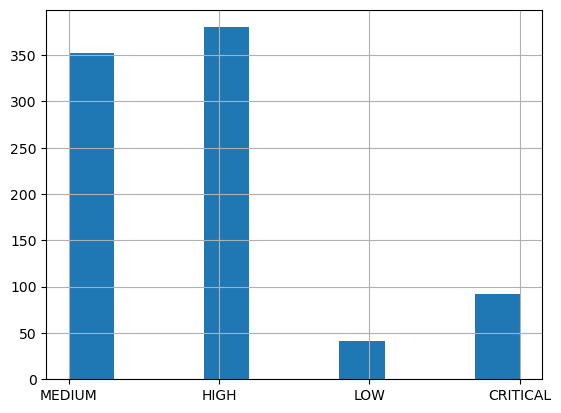

In [4]:
df['Severity'].hist()

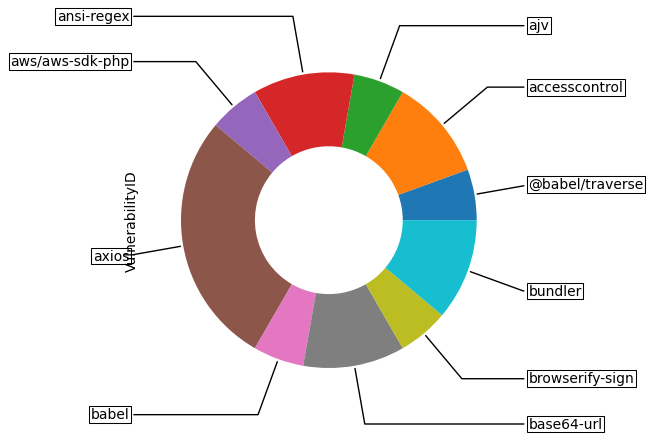

In [5]:
import numpy as np
import random
df_plot = df.groupby(['PkgName']).count().head(10)
axes = df_plot.plot.pie(y='VulnerabilityID', startangle=0, radius=1, legend=None, labels=None, wedgeprops=dict(width=0.5))
wedges = axes.patches
bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(wedges):
    name_df = df_plot.iloc[[i]].index.tolist()[0]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axes.annotate(name_df, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

In [6]:
containers = df['Container'].unique()

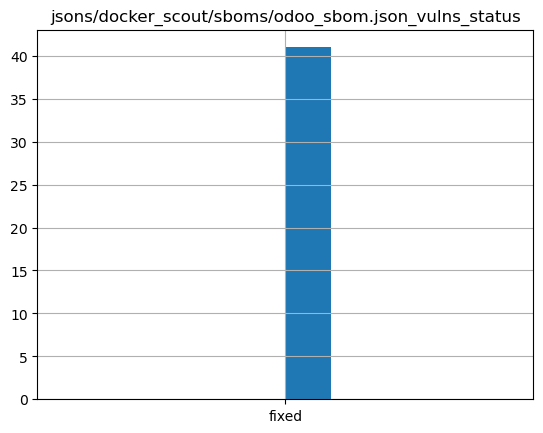

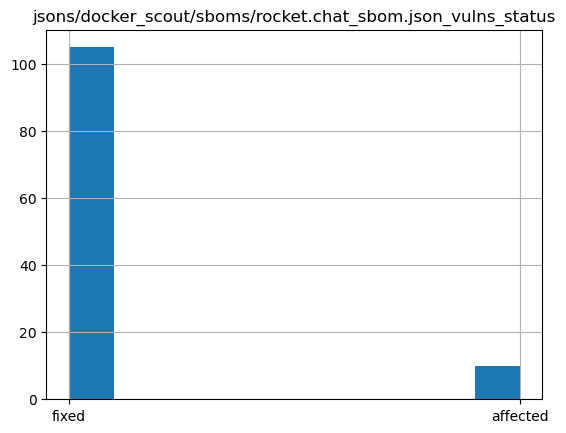

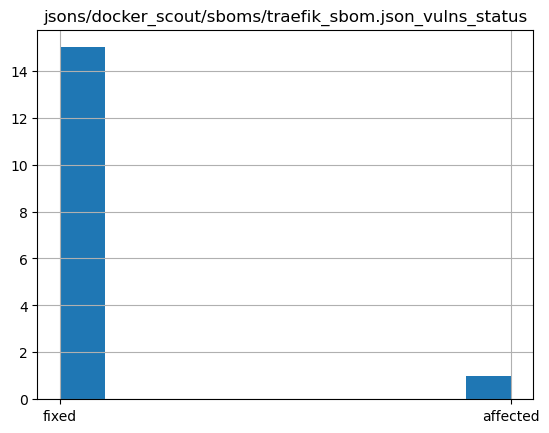

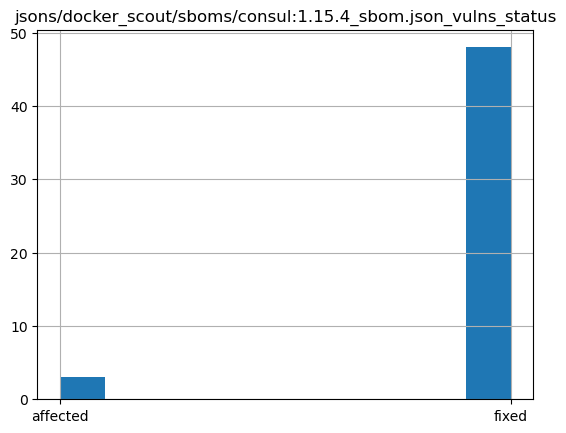

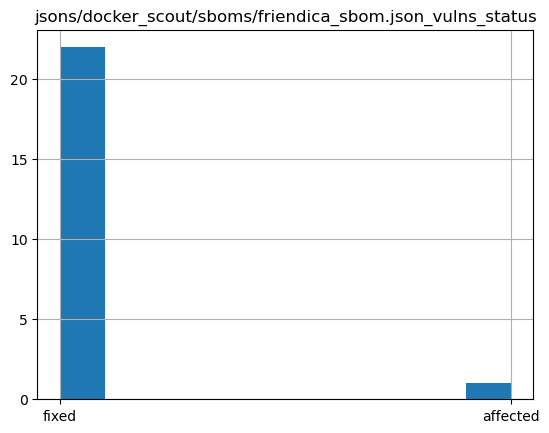

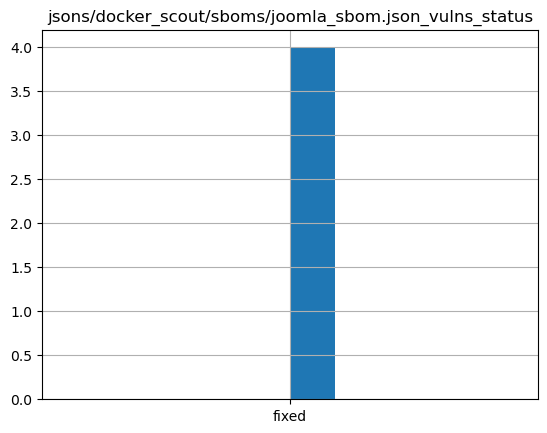

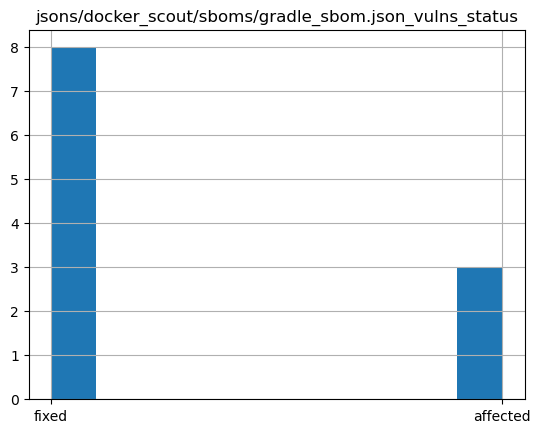

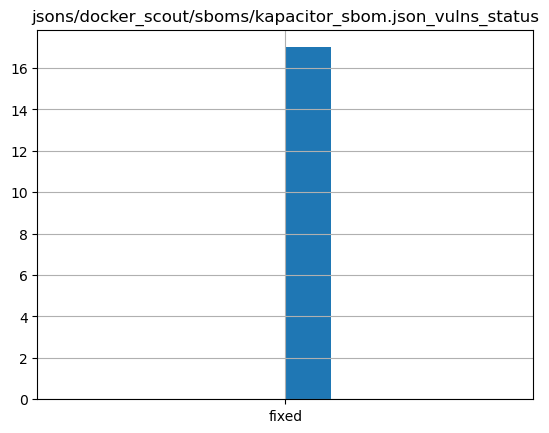

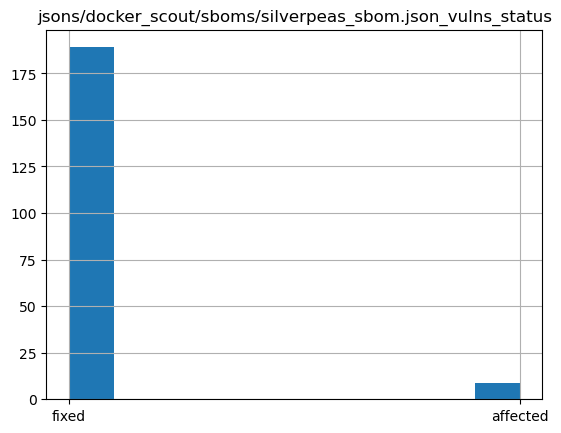

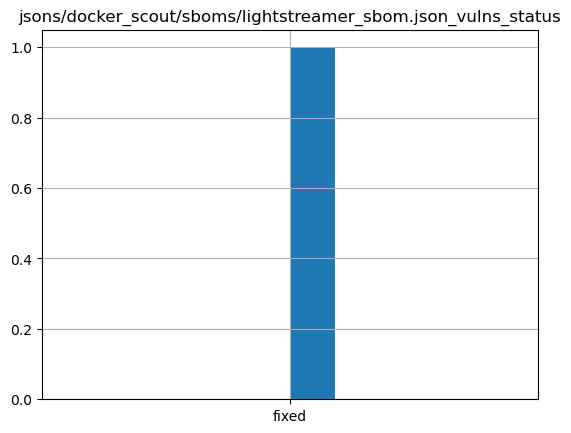

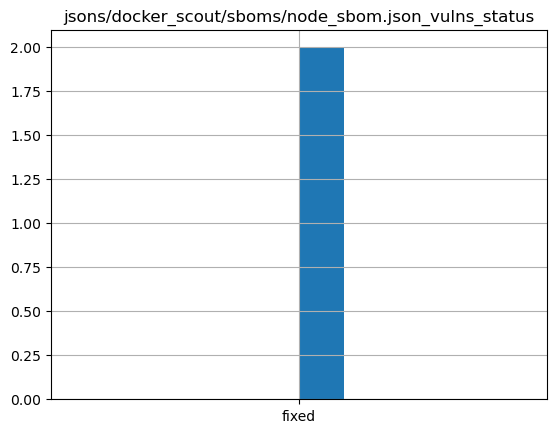

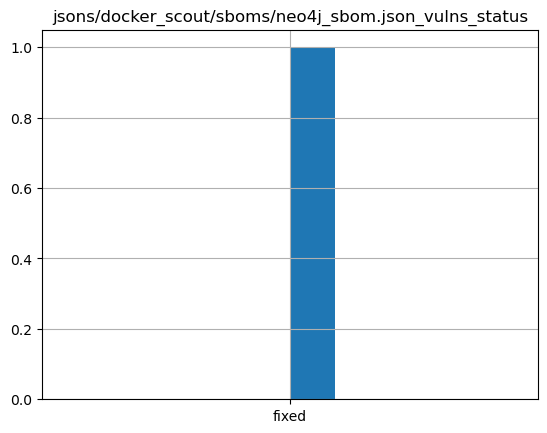

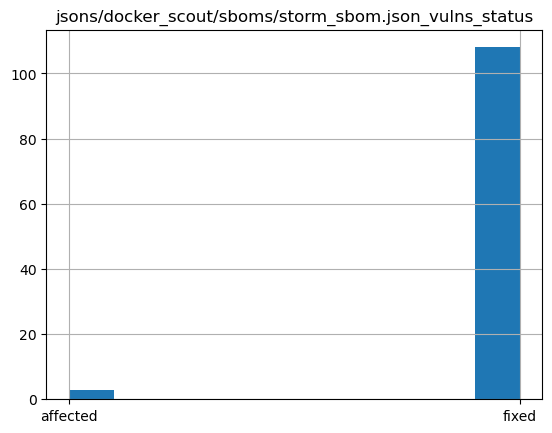

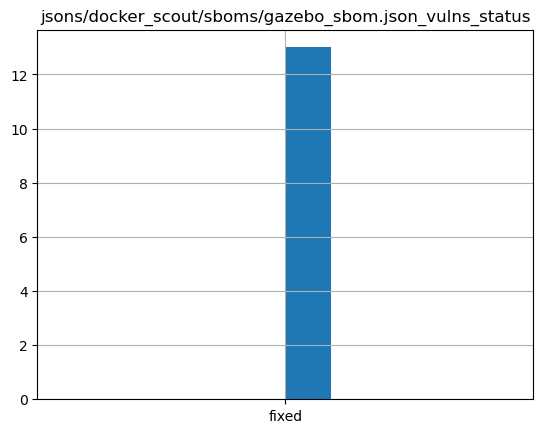

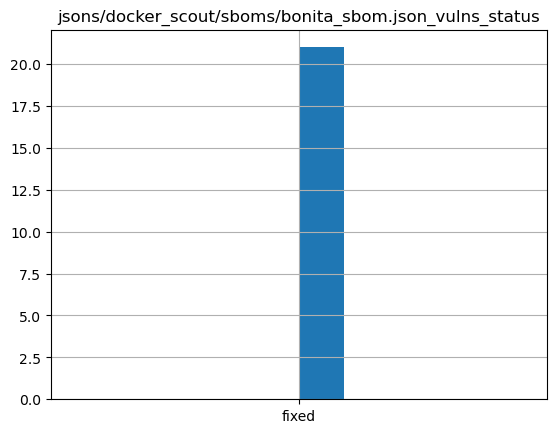

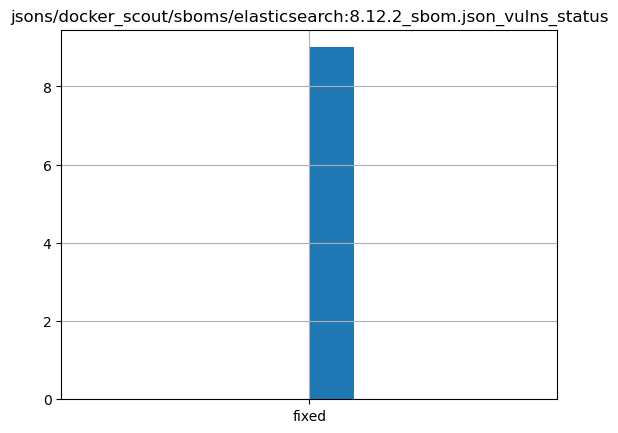

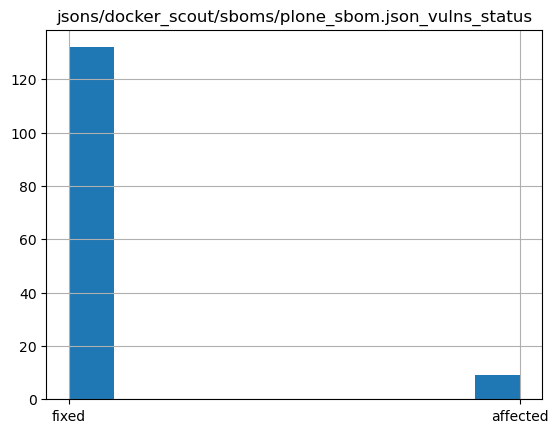

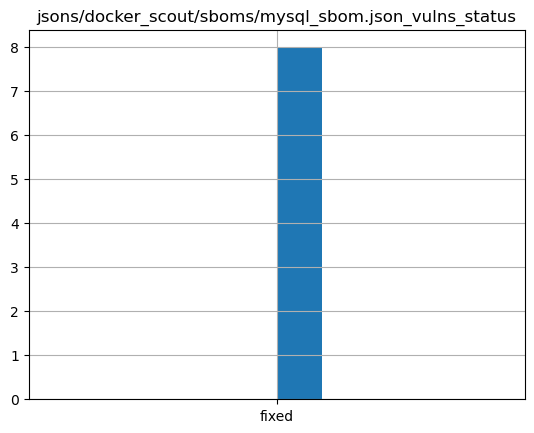

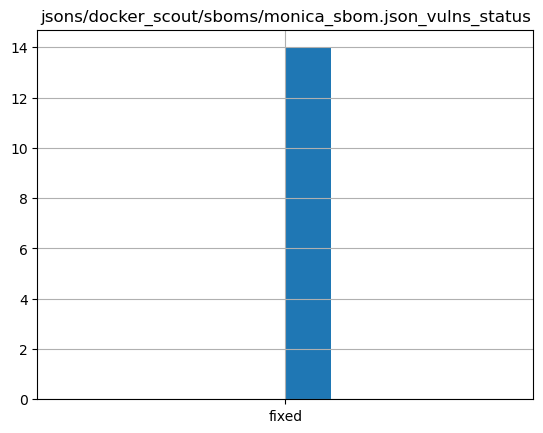

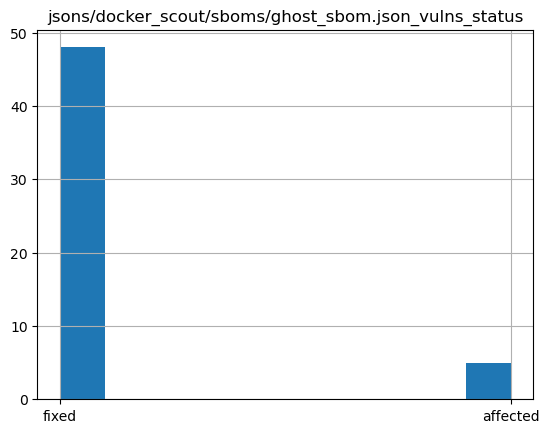

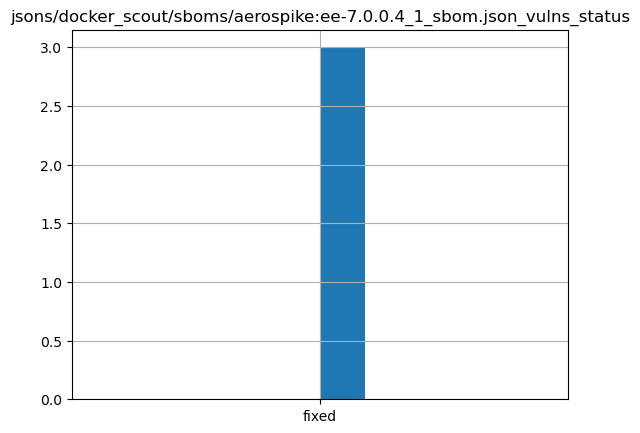

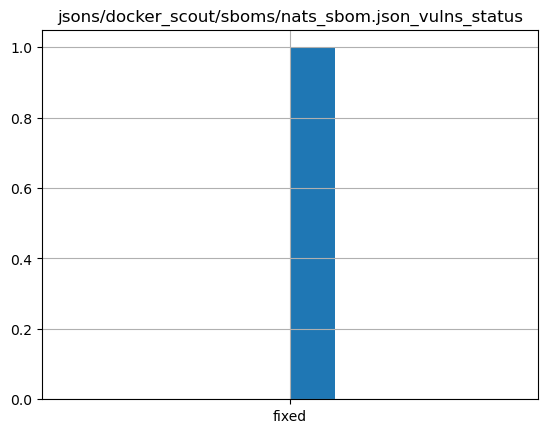

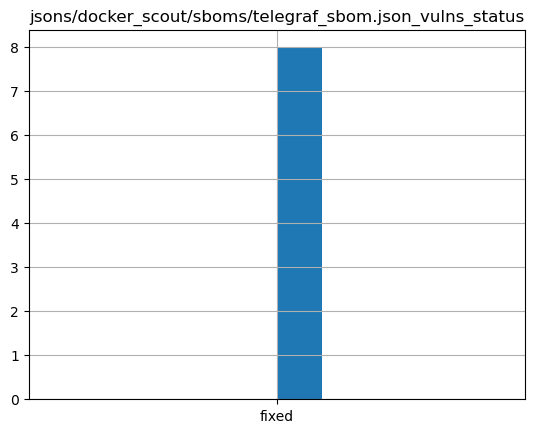

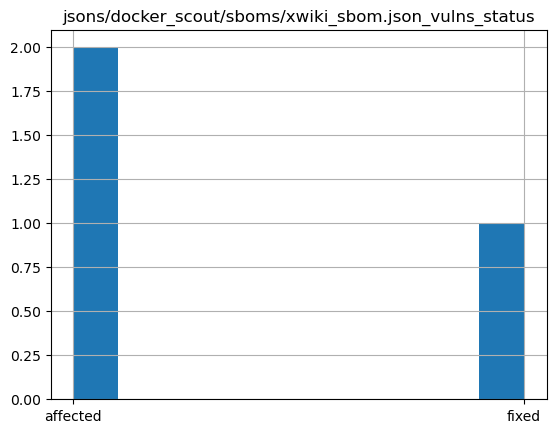

In [7]:
for container in containers:
    df.loc[df['Container'] == container]['Status'].hist()
    plt.title(container+"_vulns_status")
    plt.show()

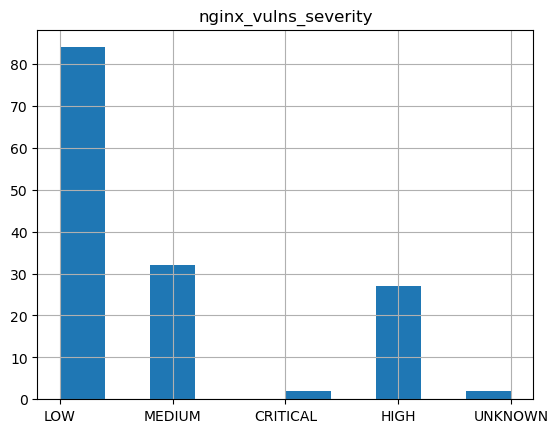

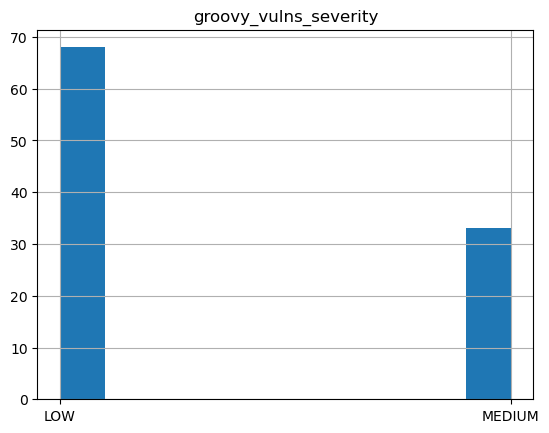

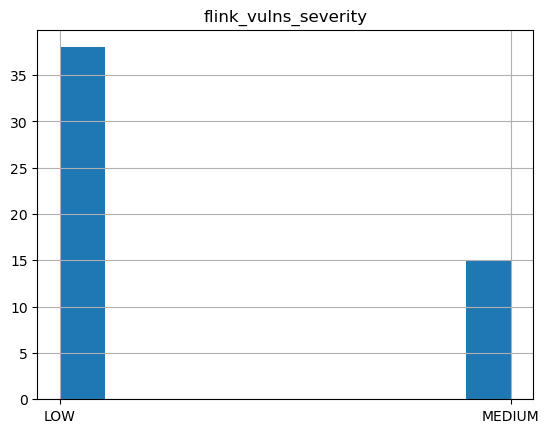

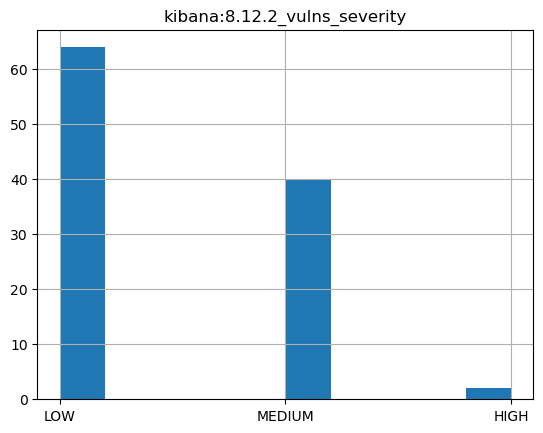

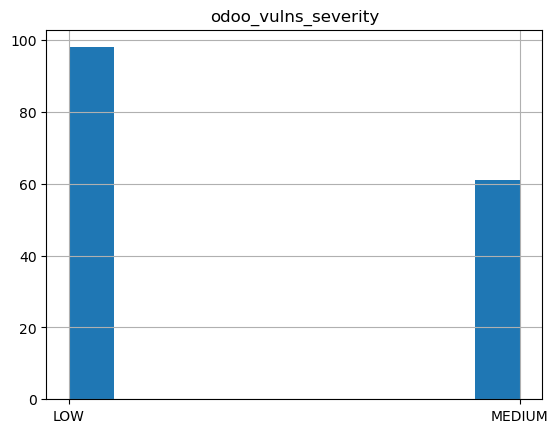

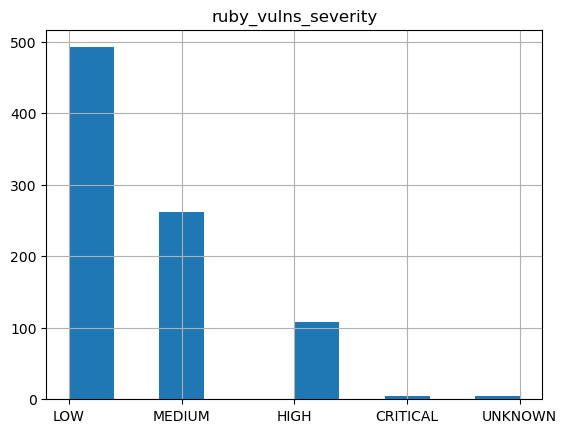

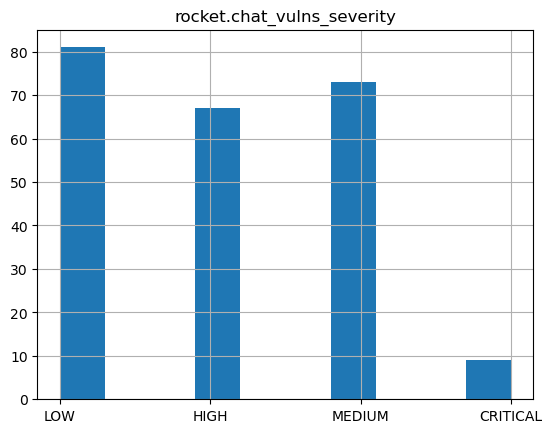

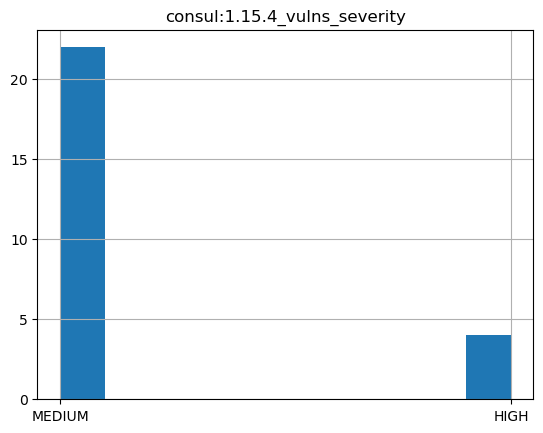

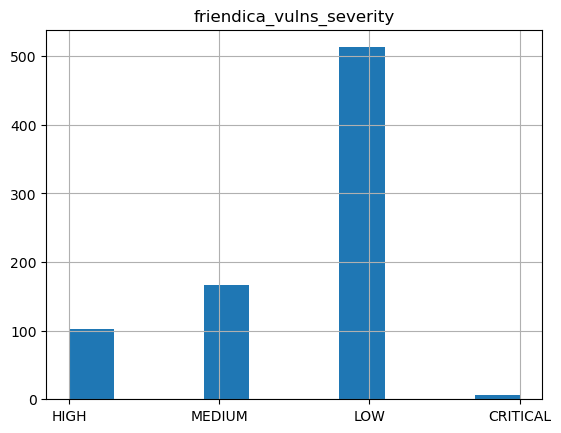

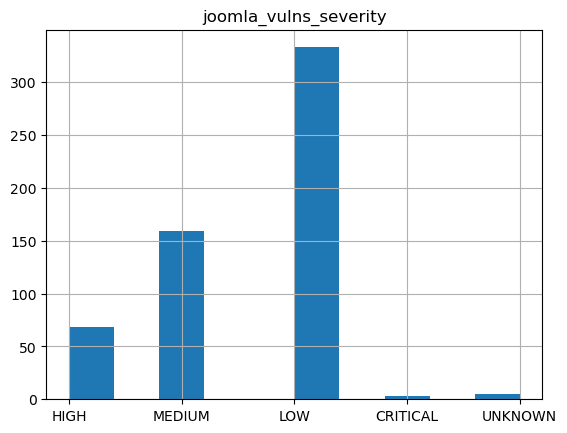

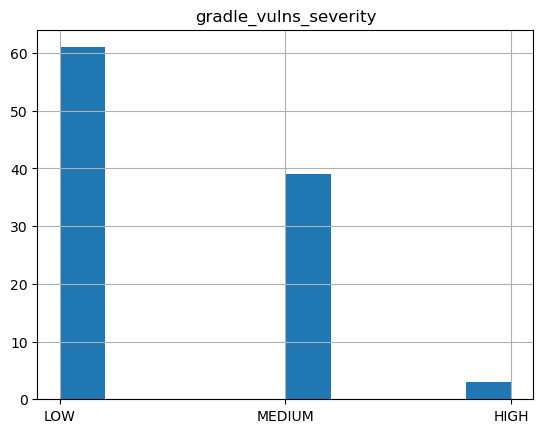

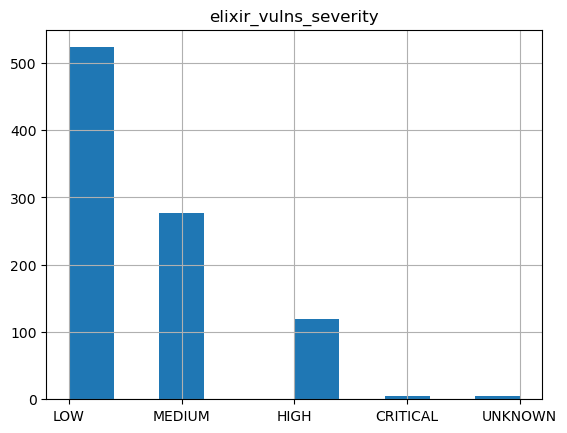

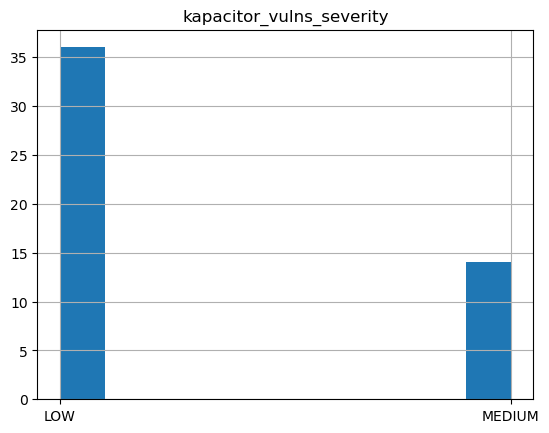

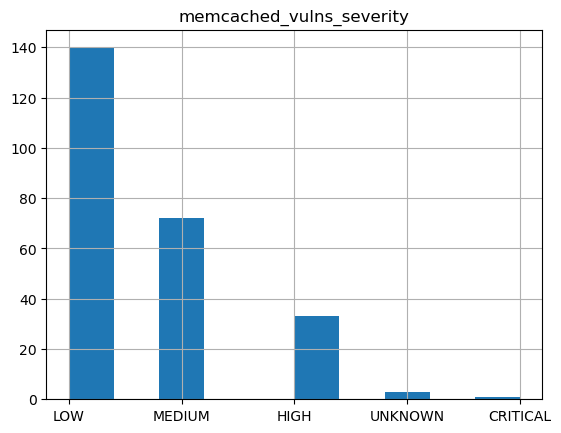

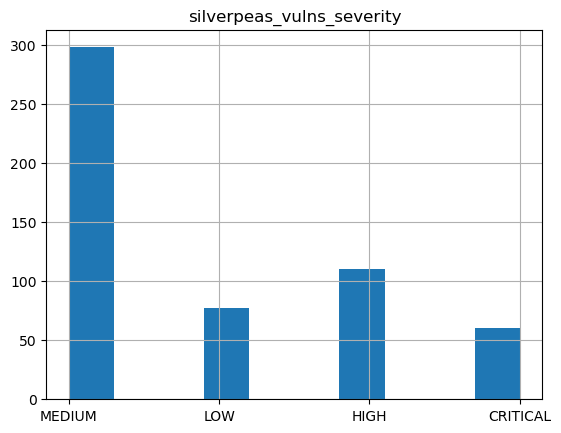

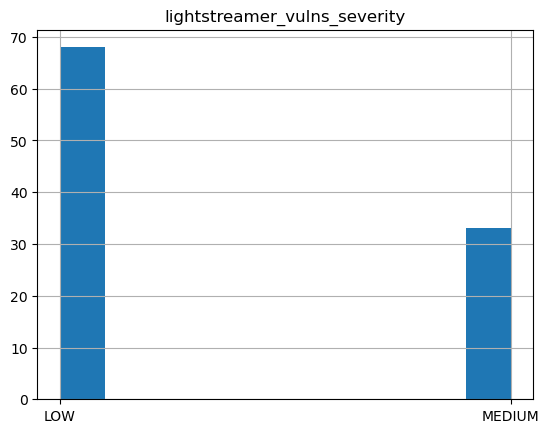

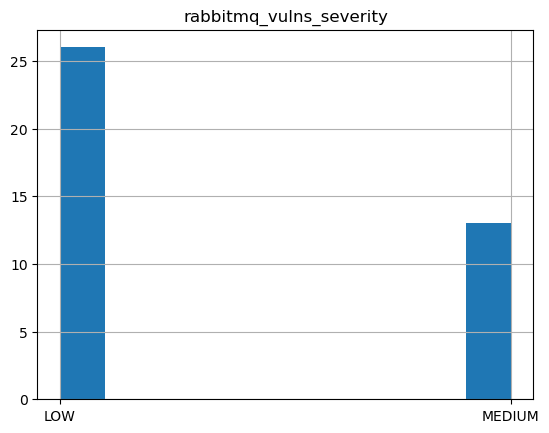

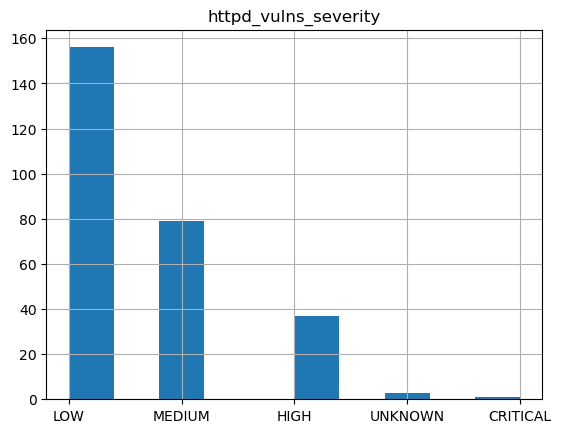

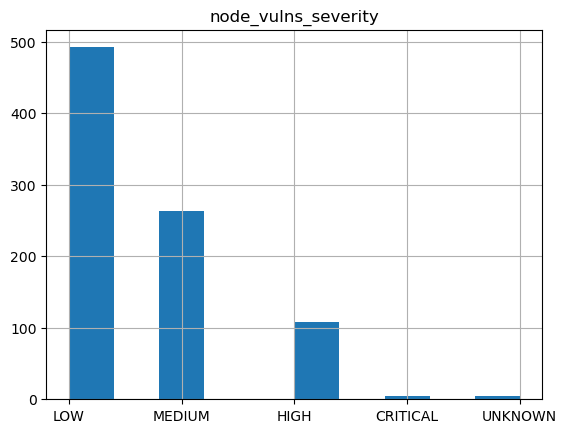

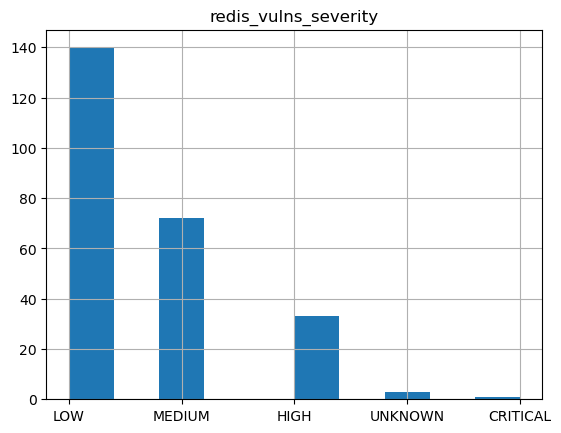

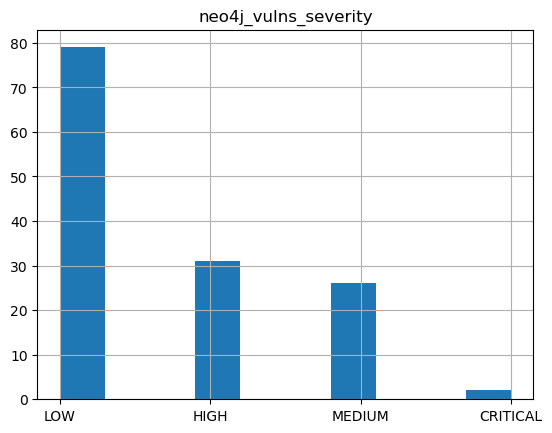

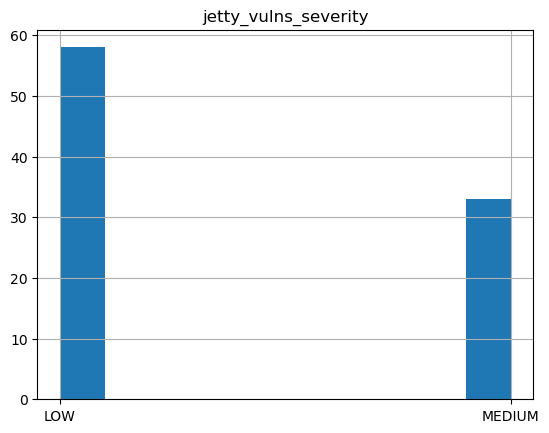

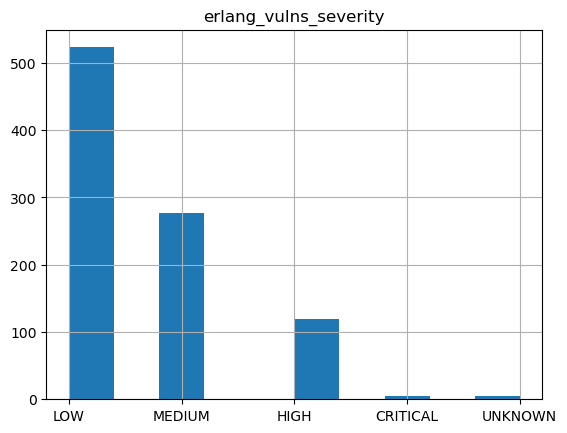

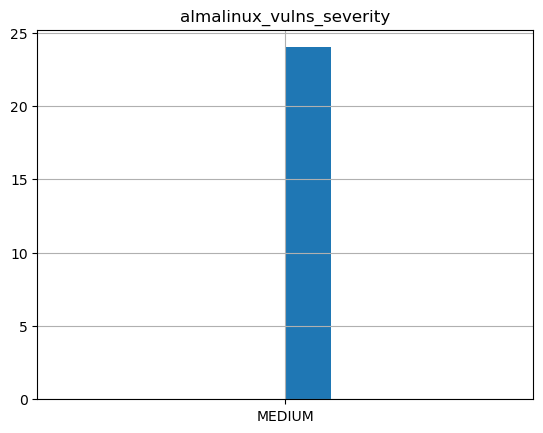

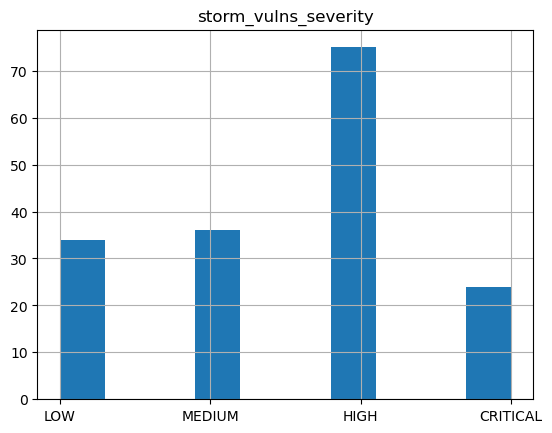

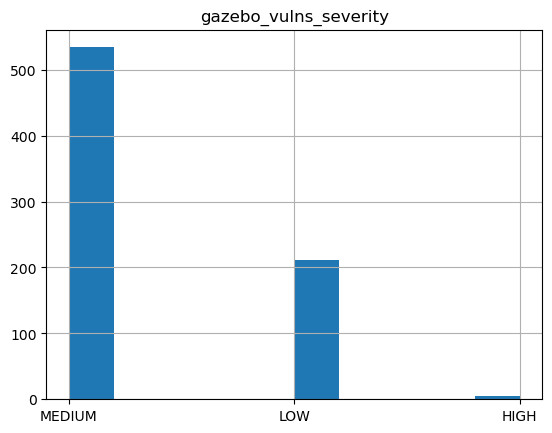

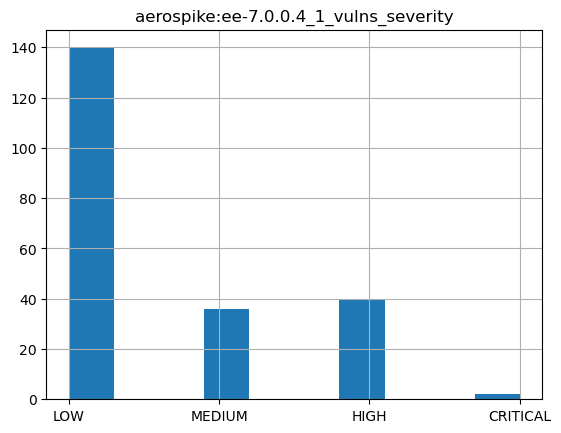

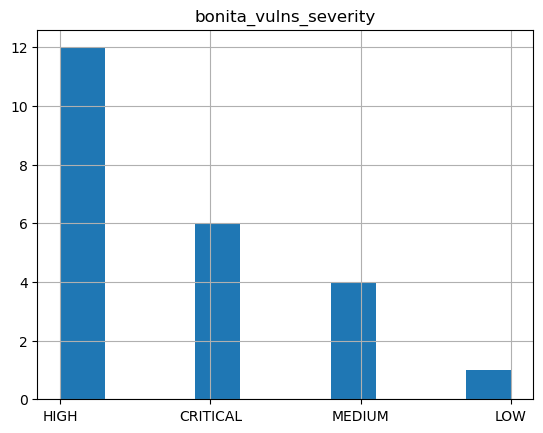

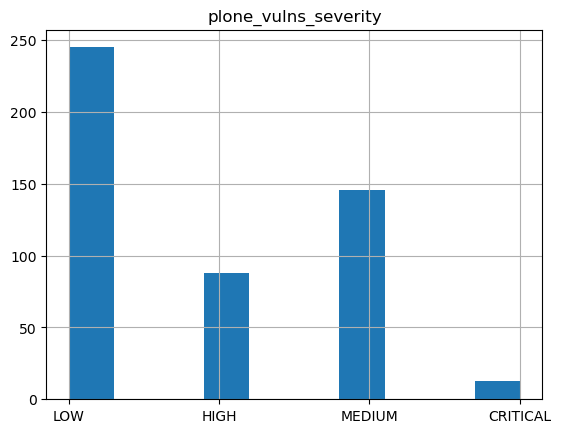

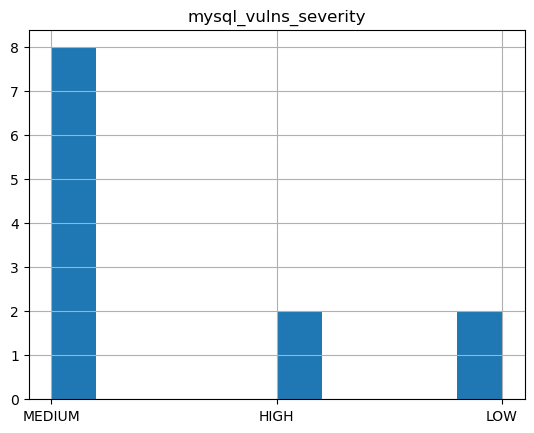

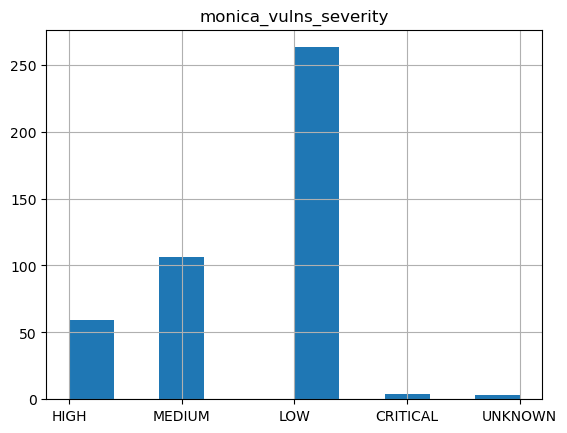

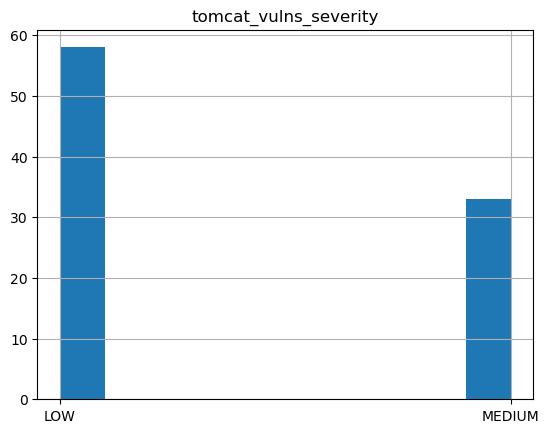

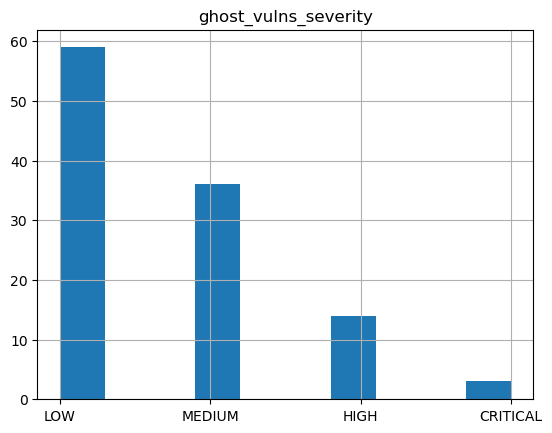

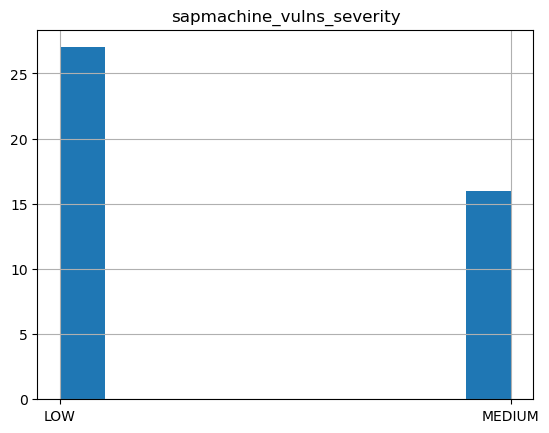

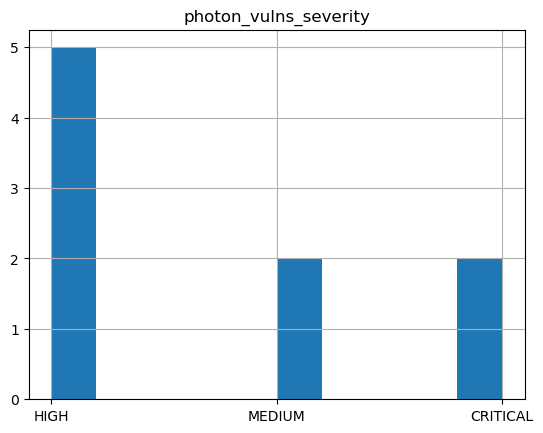

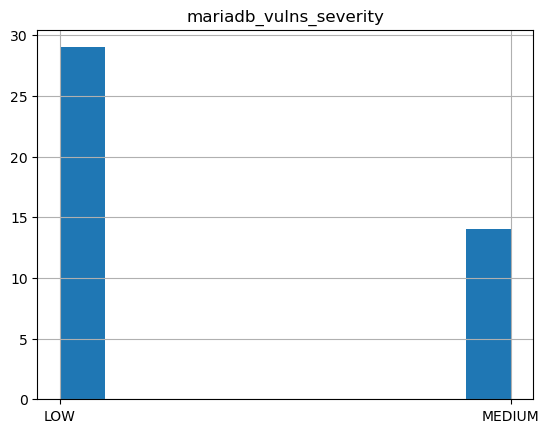

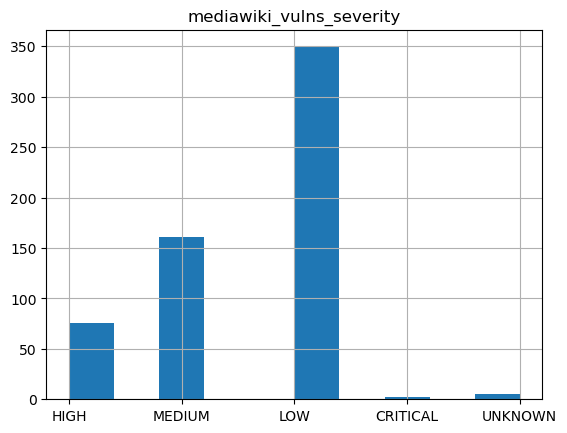

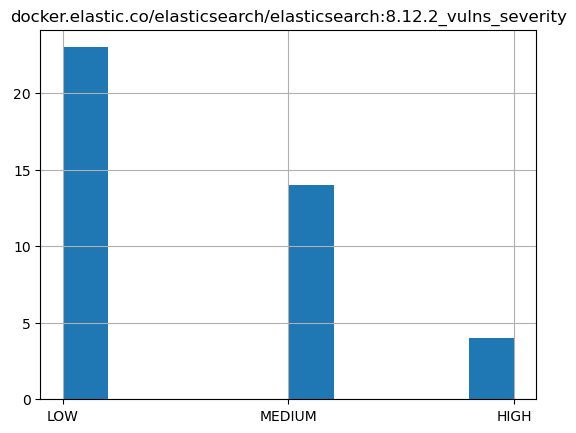

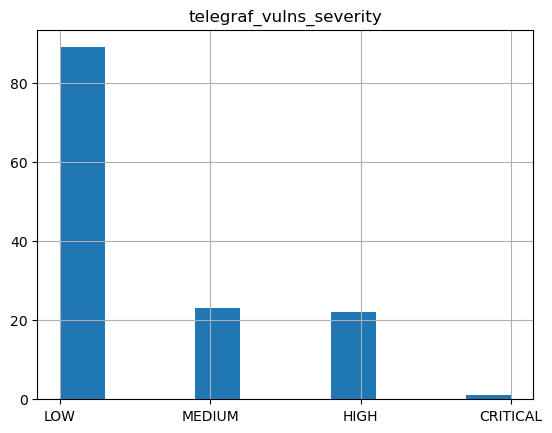

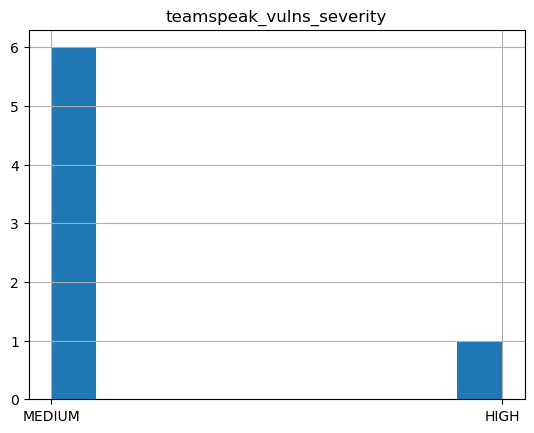

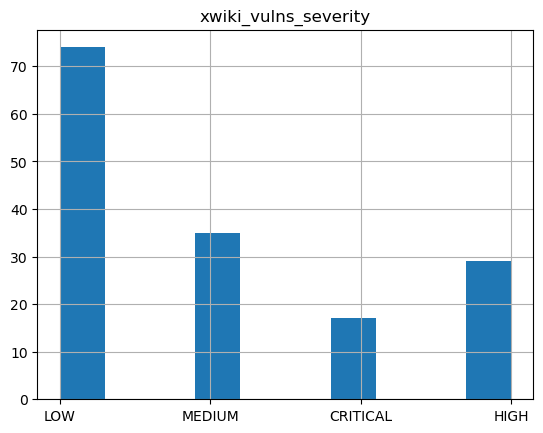

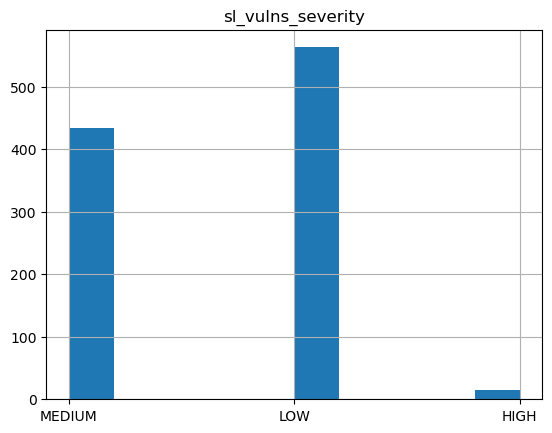

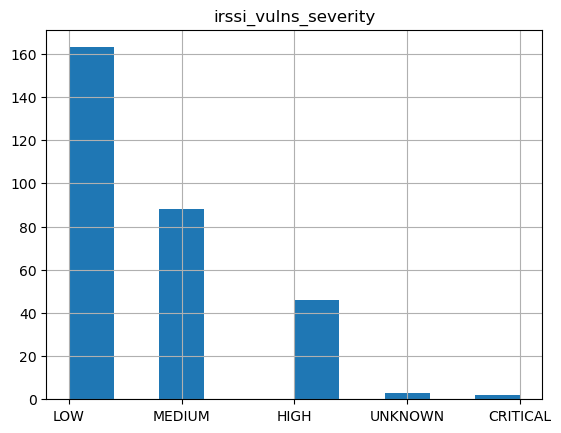

In [19]:
for container in containers:
    df.loc[df['Container'] == container]['Severity'].hist()
    plt.title(container+"_vulns_severity")
    plt.show()

In [8]:
len(df.loc[df['Severity'] == "CRITICAL"])

92